Comparer le LS avec régression linéaire et le LS lorsqu'on utilise un réseau de neurones (régression non-linéaire) pour apprendre la fonction de continuation. 

C'est un travail numérique prospectif à faire pour le mardi 11 mars en s'interrogeant sur les différents paramètres: nombres de scénarios, nombre d'epochs, taille de batch, réglage du learning rate, normalisation des données simulées...

In [ ]:
import torch
from torch import nn 
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 


import torch
import torch.nn as nn
import torch.optim as optim

nombres de scénarios, nombre d'epochs, taille de batch, réglage du learning rate, normalisation des données simulées...

la fonction de continuation est une focntion de R dans R ,  #8 neuronnes 4 neuronnes 2 couches  8 neuronnes equivalents à (16+ 8*4+4 +4)

#MSloss pour les probleme de moindre carre 
#Relu
#linear pour une couche d'appli linéaire 


#il ya 2 syntaxe (celle du prof est deja direct mais il y en a une autre)

#Feedforward Neural Network :(je sais pas pourquoi ce mot technique )

#la question est: si j 'ai une fonction avec une brisure comme c'est le cas ici, qu'elle est la bonne architecture pour detectee cettte application (presquelinéaire) par morceau .

#peut etre ajouter une fonction sa'activation à la fin pour avoir que la partie positif?

#loss.backward calcule le loss parapoort à theata 

#full c'est quan don considere l'esperance

#SGD c'est quand on considere un seul path?


In [18]:
# choisir un optimiseur , adam ou 

np.random.seed(42)  # fix the seed for every valuation

In [54]:
#paramétres
r=0.1
sigma=0.25
x_0=100
K=110
N=10   
T=1
npaths=1000000
ts = np.linspace(0, T, N+1)

In [ ]:
# Simulation Monte-Carlo du processus Black-Scholes

def blackscholes_mc(S, vol, r, ts, npaths):

    nsteps = len(ts) - 1
    ts = np.asfarray(ts)[:, np.newaxis]
    W = np.cumsum(np.vstack((np.zeros((1, npaths)),
                             np.random.randn(nsteps, npaths) * np.sqrt(np.diff(ts, axis=0)))),
                  axis=0)
    paths = np.exp(-0.5*vol**2*ts + vol*W)*S*np.exp((r)*ts)
    return paths


    paths=blackscholes_mc(x_0, sigma, r, ts, npaths)
paths_torch = torch.from_numpy(paths).float()
print(paths_torch.shape) 

In [45]:
paths=blackscholes_mc(x_0, sigma, r, ts, npaths)
paths_torch = torch.from_numpy(paths).float()
print(paths_torch.shape) 

torch.Size([11, 1000000])


In [ ]:
#normalizing

In [24]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(  #champs de ces objets?, ou est le biais??)# par defaut c'es true
            nn.Linear(3, 8),
            nn.ReLU(),
            nn.Linear(8, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):  #surcharge methode forward, programation fonctionnel?
        out = self.linear_relu_stack(x)
        return out

In [ ]:
Phi = NeuralNetwork()

def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

Phi.apply(init_weights)

In [15]:
x = torch.tensor([0.2, 0.3, 0.4])
print(Phi(x))

tensor([0.4451], grad_fn=<ViewBackward0>)


In [ ]:
"""num_epochs = 50
learning_rate = 0.001
batch_size = 32"""




num_epochs = 20
batch_size = 1024
learning_rate = 1e-3
layers_shapes=[8, 8]

#il faut definir le loss et l'optimizer!

In [12]:
Phi.get_parameter("linear_relu_stack.0.weight")

Parameter containing:
tensor([[-0.4460,  0.3497, -0.2720],
        [-0.2360, -0.5141, -0.4507],
        [-0.2608, -0.4075, -0.2435],
        [ 0.1422, -0.2414, -0.0155],
        [-0.3481,  0.2464,  0.0577],
        [-0.2629, -0.2844, -0.0531],
        [ 0.4364, -0.3653, -0.4121],
        [-0.1599,  0.4968,  0.2690]], requires_grad=True)


phi_recharge = MonReseau() # creer un instance

phi.state_dict() # sauvegarde les parametres


phi_recharge.load_state_dict(torch.load('modele_phi.pth'))


phi_recharge.eval()# peut etre obigatoire 

#normalisation

def noramlizex()

def normalizey()

def unormalize



In [ ]:
def regression_nn(x, y, layer_sizes, n_epochs, batch_size, 
                      learning_rate=1e-3, 
                      theta_init=None):   
    data_size, input_size = x.shape
    n_upd = data_size // batch_size 
    
    phi = NeuralNetwork(input_size, layer_sizes, output_size=1).to(device)
    #if theta_init is not None:
     #   phi.load_state_dict(theta_init.copy())
    #optimizer = torch.optim.Adam(phi.parameters(), lr=learning_rate)
    
    with tqdm(range(n_epochs)) as nrange:
        for n in nrange:
            indexes = torch.randperm(data_size)
            for k in range(n_upd):
                idx = indexes[k*batch_size:(k+1)*batch_size] 
                loss = ((yj[idx] - phi(xj[idx]))**2).mean()
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            nrange.set_postfix(loss=loss.item())
    return phi.state_dict(), phi(xj)

In [ ]:
payoff = np.maximum(K - paths[-1], 0).copy()

# Matrice pour stocker les coefficients du polynôme
poly_coeffs = np.zeros((len(ts) - 1, 4)) 


for i in range(len(ts) - 2, 0, -1):
    discount = np.exp(-r * (ts[i + 1] - ts[i]))
    payoff *= discount
    
    # Régression polynomiale
    p = np.polyfit(paths[i], payoff, deg=3) #polynôme de degré 3
    poly_coeffs[i] = p  
    contval = np.polyval(p, paths[i])  # Valeur de continuation
    exerval = np.maximum(K - paths[i], 0)  # Valeur d'exercice
    
    C[i] = contval
    V[i] = np.maximum(exerval, contval)
    
    # Identifier les chemins où il faut exercer
    ind = exerval > contval
    payoff[ind] = exerval[ind]


print("Valeur de l'option:",max(np.mean(payoff*np.exp(-r*(ts[1]-ts[0]))),10)) # K-x_0=10

In [71]:
x = np.maximum(K - paths[-1], 0).copy()
y=paths[-2]*np.exp(-r * (ts[1] - ts[0]))

In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

def train_neural_network(x, y, layers_shapes, batch_size, epochs, learning_rate=0.01):
    # Convertir les données en tenseurs
    x_tensor = torch.from_numpy(x).float()  # Assurez-vous que les données sont au format float
    y_tensor = torch.from_numpy(y).float()

    # Définition dynamique du réseau selon layers_shapes
    layers = []
    input_shape = 1  # La forme d'entrée doit correspondre au nombre de caractéristiques
    for shape in layers_shapes[:-1]:
        layers.append(nn.Linear(in_features=input_shape, out_features=shape, bias=True))
        layers.append(nn.ReLU())
        input_shape = shape

    # Couche de sortie
    layers.append(nn.Linear(in_features=input_shape, out_features=layers_shapes[-1], bias=True))

    model = nn.Sequential(*layers)
    print(model)
    
    def init_weights(m):
        if isinstance(m, nn.Linear):
            torch.nn.init.xavier_uniform_(m.weight)
            m.bias.data.fill_(0.01)

    model.apply(init_weights)

    # Fonction de perte (erreur quadratique moyenne)
    criterion = nn.MSELoss()

    # Optimiseur (Adam)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Boucle d'entraînement
    dataset = TensorDataset(x_tensor, y_tensor)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        for xb, yb in loader:
            optimizer.zero_grad()
            predictions = model(xb)
            loss = criterion(predictions, yb)  # Utilisation de la fonction de perte définie
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    return model.state_dict()

In [100]:
def create_model(layers_shapes):
        layers = []
        input_shape = 1  # Chaque échantillon est un scalaire
        for shape in layers_shapes[:-1]:
            layers.append(nn.Linear(in_features=input_shape, out_features=shape, bias=True))
            layers.append(nn.ReLU())
            input_shape = shape
        layers.append(nn.Linear(in_features=input_shape, out_features=layers_shapes[-1], bias=True))
        return nn.Sequential(*layers)

def init_weights(m):
        if isinstance(m, nn.Linear):
            torch.nn.init.xavier_uniform_(m.weight)
            m.bias.data.fill_(0.01)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

def train_neural_network(x, y, layers_shapes, batch_size, epochs, learning_rate=0.01):
    # Convertir les données en tenseurs
    x_tensor = torch.from_numpy(x).float().view(-1, 1)  # Forme (nombre_d'échantillons, 1)
    y_tensor = torch.from_numpy(y).float().view(-1, 1)  # Forme (nombre_d'échantillons, 1)

    model = create_model(layers_shapes)
    model.apply(init_weights)

    # Fonction de perte (erreur quadratique moyenne)
    criterion = nn.MSELoss()

    # Optimiseur (Adam)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Boucle d'entraînement
    dataset = TensorDataset(x_tensor, y_tensor)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        for xb, yb in loader:
            optimizer.zero_grad()
            predictions = model(xb)  # xb a une forme (batch_size, 1)
            loss = criterion(predictions, yb)  # Utilisation de la fonction de perte définie
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    return model.state_dict()

vv=train_neural_network(payoff, y, layers_shapes, batch_size, num_epochs, learning_rate=0.01)

In [ ]:
x=np.linspace(1,100,10000)
y=x**2+1

In [123]:
num_epochs = 100
batch_size = 100
learning_rate = 1e-4
layers_shapes=[8, 8,1]# shape 1 en sortie

In [116]:
vv=train_neural_network(x, y, layers_shapes, batch_size, num_epochs, learning_rate)

Epoch 1/100, Loss: 20115272.0
Epoch 2/100, Loss: 24201526.0
Epoch 3/100, Loss: 24160648.0
Epoch 4/100, Loss: 20985430.0
Epoch 5/100, Loss: 23905250.0
Epoch 6/100, Loss: 16687813.0
Epoch 7/100, Loss: 19824988.0
Epoch 8/100, Loss: 19027406.0
Epoch 9/100, Loss: 22656876.0
Epoch 10/100, Loss: 19655076.0
Epoch 11/100, Loss: 16905158.0
Epoch 12/100, Loss: 18870956.0
Epoch 13/100, Loss: 13881600.0
Epoch 14/100, Loss: 18008026.0
Epoch 15/100, Loss: 17831008.0
Epoch 16/100, Loss: 19003426.0
Epoch 17/100, Loss: 21454964.0
Epoch 18/100, Loss: 19685276.0
Epoch 19/100, Loss: 17977514.0
Epoch 20/100, Loss: 16768488.0
Epoch 21/100, Loss: 17172192.0
Epoch 22/100, Loss: 15330712.0
Epoch 23/100, Loss: 18097590.0
Epoch 24/100, Loss: 15879316.0
Epoch 25/100, Loss: 16910244.0
Epoch 26/100, Loss: 13536641.0
Epoch 27/100, Loss: 14546255.0
Epoch 28/100, Loss: 14247633.0
Epoch 29/100, Loss: 13079023.0
Epoch 30/100, Loss: 12342075.0
Epoch 31/100, Loss: 15589185.0
Epoch 32/100, Loss: 11547825.0
Epoch 33/100, Los

In [117]:
# Créer le modèle
model = create_model(layers_shapes)

# Charger les poids entraînés
model.load_state_dict(vv)

# Passer le modèle en mode évaluation (important pour désactiver des couches comme Dropout)
model.eval()

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
)

In [118]:
# Créer le modèle
model = create_model(layers_shapes)

# Charger les poids entraînés
model.load_state_dict(vv)

# Passer le modèle en mode évaluation (important pour désactiver des couches comme Dropout)
model.eval()

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
)

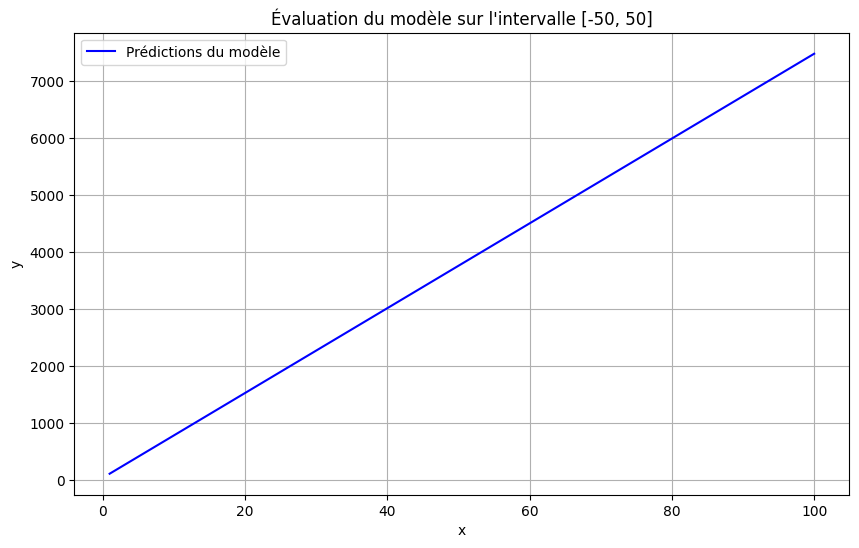

In [122]:
# 2. Générer des données sur l'intervalle [-50, 50]
x_values = np.linspace(-50, 50, 1000)  # 1000 points entre -50 et 50
x_tensor = torch.from_numpy(x).float().view(-1, 1)  # Convertir en tenseur PyTorch

# 3. Faire des prédictions
with torch.no_grad():  # Désactiver le calcul du gradient
    y_pred = model(x_tensor)

# Convertir les prédictions en tableau numpy
y_pred = y_pred.numpy()
#y_payoff=np.maximum(0,x_values-110)

# 4. Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(x, y_pred, label="Prédictions du modèle", color="blue")
#plt.plot(x_values, y_payoff, label="Prédictions du modèle", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Évaluation du modèle sur l'intervalle [-50, 50]")
plt.grid(True)
plt.legend()
plt.show()

torch.Size([1000000])

In [77]:
x_tensor = torch.from_numpy(x)

In [72]:
x.shape

(1000000,)

In [73]:
x_tensor.shape

torch.Size([3])

In [ ]:
modelcopy=model.load_state_dict(vv)

In [42]:
import torch
import torch.nn as nn

# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc = nn.Linear(10, 5)

    def forward(self, x):
        return self.fc(x)

# Instantiate model
model = SimpleNet()

# Access state_dict
state_dict = model.state_dict()

# View keys in state_dict
print(state_dict.keys())


odict_keys(['fc.weight', 'fc.bias'])


In [ ]:
# Exemple de données fictives
x_example = np.random.rand(100, 1)
y_example = x_example**2


layers_shapes = [8, 8, 8, 1]
batch_size = 16
epochs = 20

trained_params = train_neural_network(x_example, y_example, layers_shapes, batch_size=batch_size, epochs=epochs)
#print("Entraînement terminé. Paramètres finaux :", trained_params)


Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=1, bias=True)
)
Epoch 1/20, Loss: 0.0236
Epoch 2/20, Loss: 0.0509
Epoch 3/20, Loss: 0.0016
Epoch 4/20, Loss: 0.0060
Epoch 5/20, Loss: 0.0007
Epoch 6/20, Loss: 0.0042
Epoch 7/20, Loss: 0.0038
Epoch 8/20, Loss: 0.0008
Epoch 9/20, Loss: 0.0005
Epoch 10/20, Loss: 0.0002
Epoch 11/20, Loss: 0.0003
Epoch 12/20, Loss: 0.0000
Epoch 13/20, Loss: 0.0003
Epoch 14/20, Loss: 0.0000
Epoch 15/20, Loss: 0.0000
Epoch 16/20, Loss: 0.0001
Epoch 17/20, Loss: 0.0001
Epoch 18/20, Loss: 0.0006
Epoch 19/20, Loss: 0.0001
Epoch 20/20, Loss: 0.0003
Entraînement terminé. Paramètres finaux : {'0.weight': array([[-0.04685352],
       [ 0.81947213],
       [ 0.234347  ],
       [-0.23960109],
       [ 0.67934954],
       [-0.19722176],
       [-0.3032173 ],


In [ ]:
x_eval = np.random.rand(20, 10)
y_eval = np.random.rand(100, 2)
trained_model.evaluate(x_example, y_example)